# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [123]:
# %pip install --upgrade plotly

### Import Statements

In [125]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
print(f'df_data has {df_data.shape[0]} rows and {df_data.shape[1]} columns\n')
print(f'First year the noble prize was awarded: {df_data.year.min()}\n')
print(f'Last year included in the dataset {df_data.year.max()}\n')

print(df_data.info())


df_data has 962 rows and 16 columns

First year the noble prize was awarded: 1901

Last year included in the dataset 2020

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  or

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

In [6]:
print(f"Are there any duplicates: {df_data.duplicated().any()}\n")
print(f"Are there any NaN values: {df_data.isna().any()}\n")
print(f"How many NaN values per column: {df_data.isna().value_counts()}\n")

Are there any duplicates: False

Are there any NaN values: year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

How many NaN values per column: year   category  prize  motivation  prize_share  laureate_type  full_name  birth_date  birth_city  birth_country  birth_country_current  sex    organization_name  organization_city  organization_country  ISO  
False  False     False  False       False        False          False      False       False       False          False                  False  False              False              False   

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [7]:
print(df_data.prize_share.value_counts())
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data['share_pct'] = df_data['prize_share'].apply(lambda x: int(x[0])/int(x[2]))

1/1    352
1/2    321
1/3    219
1/4     70
Name: prize_share, dtype: int64


#### Add a Column with the Prize Share as a Percentage

In [8]:
df_data['share_pct'].value_counts()

1.00    352
0.50    321
0.33    219
0.25     70
Name: share_pct, dtype: int64

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [9]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00  
2           Marburg              Germany  POL       1.00  
3               NaN                  NaN  FRA       0.50  
4               NaN                  NaN  CHE       0.50

In [10]:
fig = px.pie(df_data, values='share_pct', names='sex', hole=.5)
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [11]:
women_data = df_data.sort_values(['sex', 'year'])
women_data[:3]

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [12]:
df_data[df_data.full_name.duplicated()]

year   category                              prize  \
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
215  1944      Peace         The Nobel Peace Prize 1944   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
62   "in recognition of her services to the advance...         1/1   
215                                                NaN         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
62     Individual                        Marie Curie, née Sklodowska   
215  Organization  Comité international de la Croix Rouge (Intern...   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
62  1867-11-07        Warsaw   Russian Empire (Poland)   
215        NaT           NaN                       NaN   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
62                     Poland  Female   
215                       NaN     NaN   
340  United States of America    Male   
348                       NaN     NaN   
424  United States of America    Male   
505            United Kingdom    Male   
523                       NaN     NaN   

                                organization_name organization_city  \
62                            Sorbonne University             Paris   
215                                           NaN               NaN   
340  California Institute of Technology (Caltech)      Pasadena, CA   
348                                           NaN               NaN   
424                        University of Illinois        Urbana, IL   
505           MRC Laboratory of Molecular Biology         Cambridge   
523                                           NaN               NaN   

         organization_country  ISO  share_pct  
62                     France  POL       1.00  
215                       NaN  NaN       1.00  
340  United States of America  USA       1.00  
348                       NaN  NaN       0.50  
424  United States of America  USA       0.33  
505            United Kingdom  GBR       0.25  
523                       NaN  NaN       1.00

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [13]:
print(f"There are nobel prizes in {len(df_data.category.unique())} categories")

There are nobel prizes in 6 categories


In [14]:
prizes_per_category = df_data.category.value_counts()
fig = px.bar(prizes_per_category,
             x=prizes_per_category.index, 
             y=prizes_per_category.values, 
             color='category', 
             color_continuous_scale='Aggrnyl',
            title='Number of Prizes Awarded per Category')
fig.update_layout(xaxis_title='Noble Prize Category',
                 coloraxis_showscale=False,
                 yaxis_title='Number of prizes')
fig.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [15]:
df_economics = df_data[df_data['category'] == 'Economics']

df_economics[df_economics.year == df_economics.year.min()]

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   

    laureate_type      full_name birth_date birth_city birth_country  \
393    Individual  Jan Tinbergen 1903-04-12  the Hague   Netherlands   
394    Individual  Ragnar Frisch 1895-03-03       Oslo        Norway   

    birth_country_current   sex                    organization_name  \
393           Netherlands  Male  The Netherlands School of Economics   
394                Norway  Male                   University of Oslo   

    organization_city organization_country  ISO  share_pct  
393         Rotterdam          Netherlands  NLD       0.50  
394              Oslo               Norway  NOR       0.50

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [16]:
cat_men_women = df_data.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women.head()

category   sex  prize
11     Physics  Male    212
7     Medicine  Male    210
1    Chemistry  Male    179
5   Literature  Male    101
9        Peace  Male     90

In [17]:
fig = px.bar(cat_men_women, x='category', y='prize', color='sex')
fig.show()

In [18]:
decades = df_data.year//10*10
df_data['decade'] = decades
decade_men_women = df_data.groupby(['sex', 'decade'], as_index=False).agg({'prize':pd.Series.count})
decade_men_women.sort_values('prize', ascending=False, inplace=True)
#decade_men_women.sort_values('decade', inplace=True)
decade_men_women.head()

sex  decade  prize
22  Male    2000    108
23  Male    2010    104
19  Male    1970     99
21  Male    1990     94
20  Male    1980     90

In [19]:
fig = px.bar(decade_men_women, x='decade', y='prize', color='sex')
fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [20]:
prize_per_year = df_data.groupby(by='year').count().prize
prize_per_year.head()

year
1901    6
1902    7
1903    7
1904    6
1905    5
Name: prize, dtype: int64

In [21]:
moving_average = prize_per_year.rolling(window=5).mean()

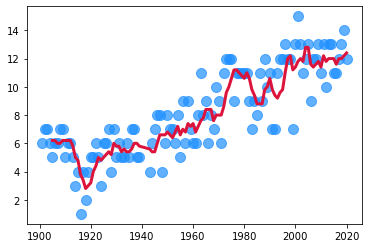

In [22]:
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

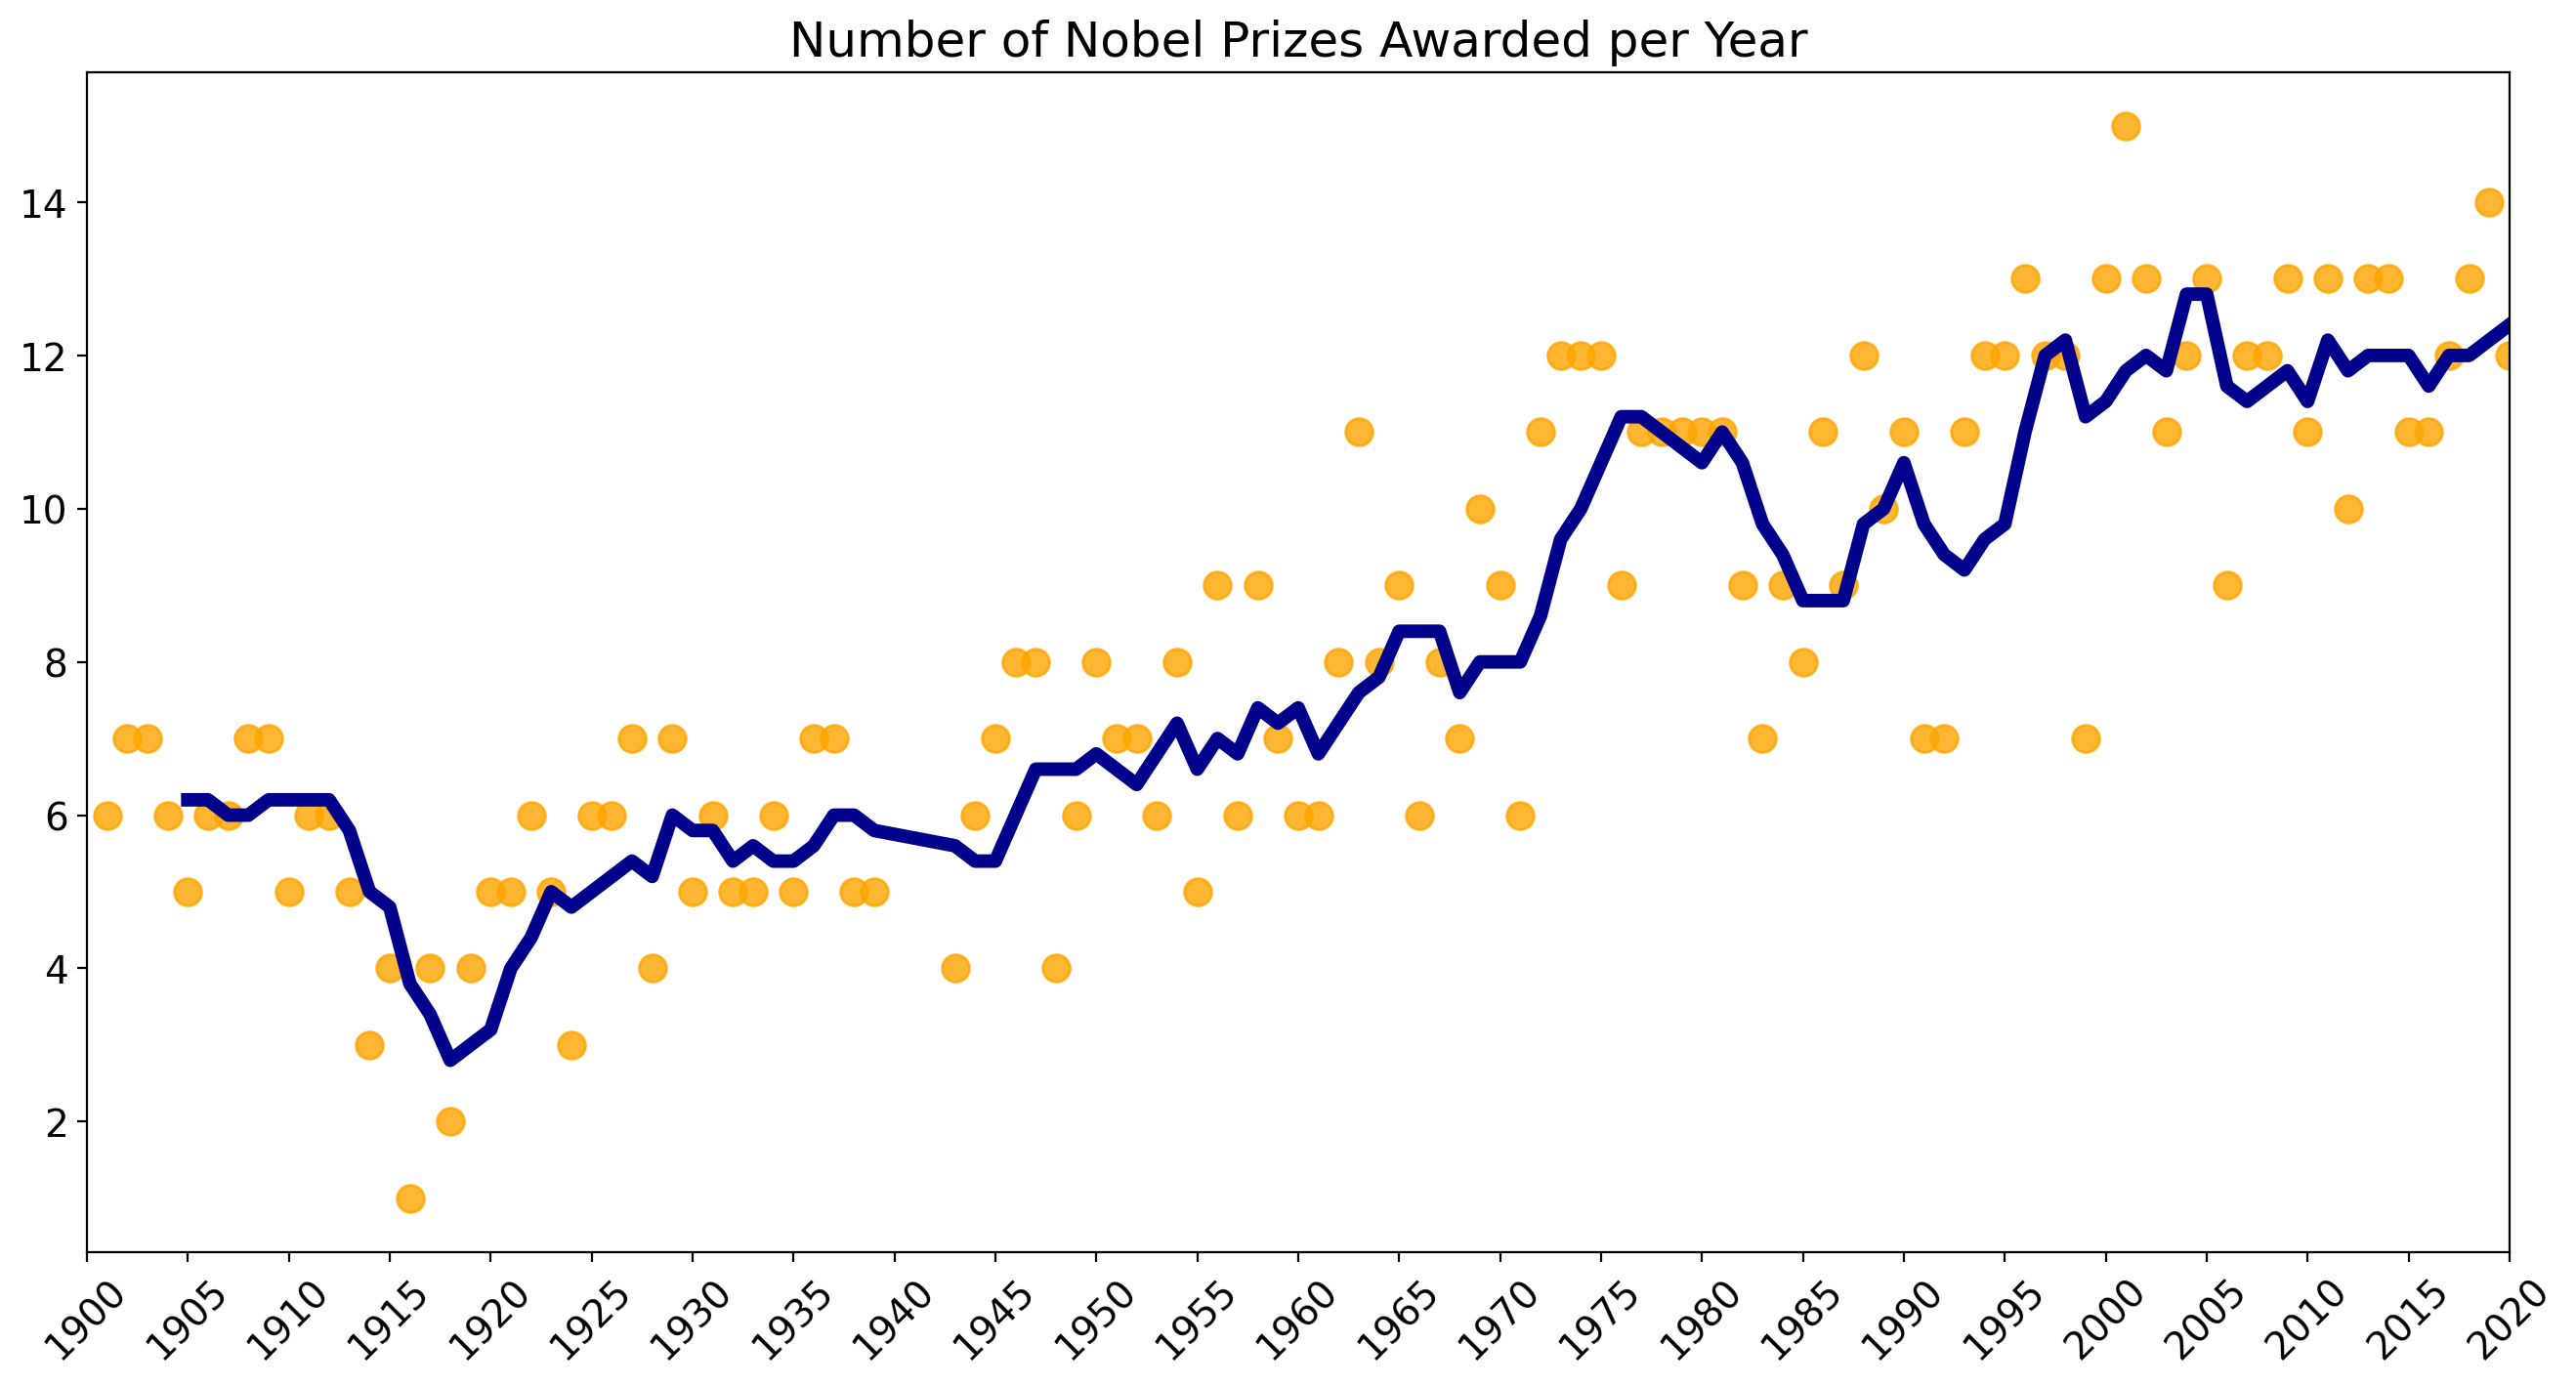

In [23]:
np.arange(1900, 2021, step=5)
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='orange',
           alpha=0.8,
           s=100)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='darkblue', 
        linewidth=5)
 
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [31]:
share_pct_per_year = df_data.groupby(by='year').mean().share_pct #this is false the one below is right

yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()
yearly_avg_share.head()

share_pct
year           
1901       0.83
1902       0.71
1903       0.71
1904       0.83
1905       1.00

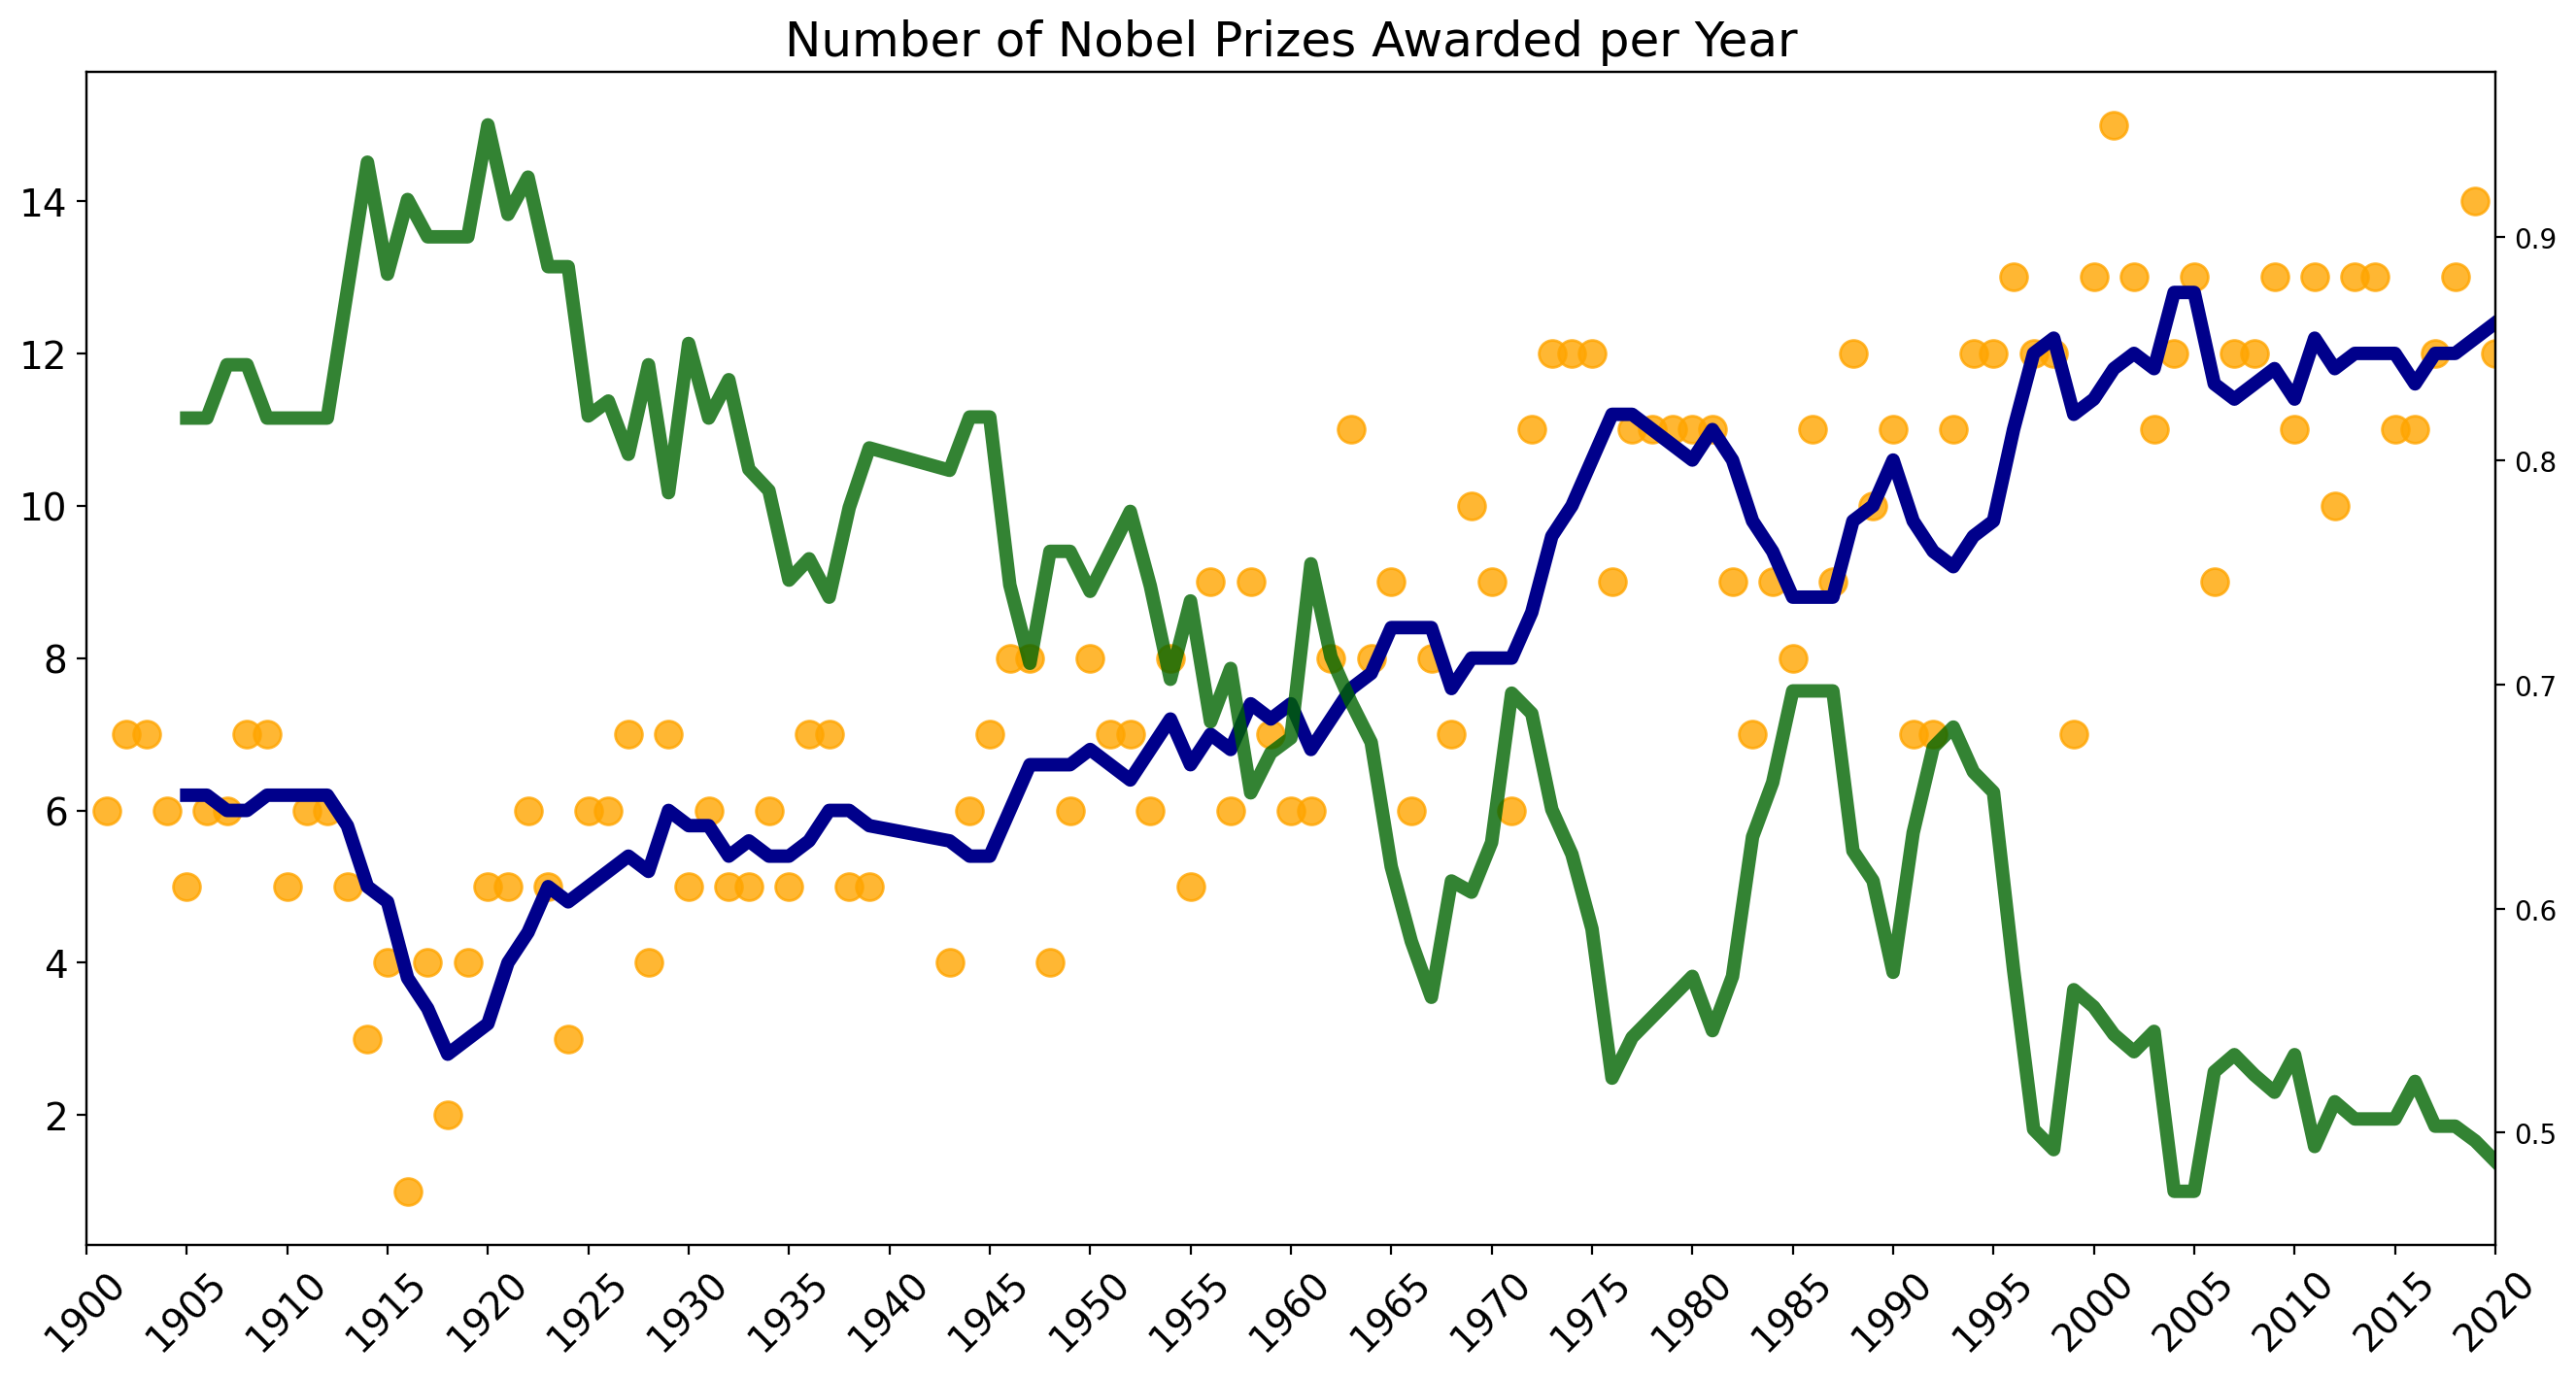

In [25]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() #copy the first axes
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='orange',
           alpha=0.8,
           s=100)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='darkblue', 
        linewidth=5)

ax2.plot(share_pct_per_year.index,
        share_moving_average,
        c='darkgreen',
        alpha=0.8,
        linewidth=5)
 
plt.show()

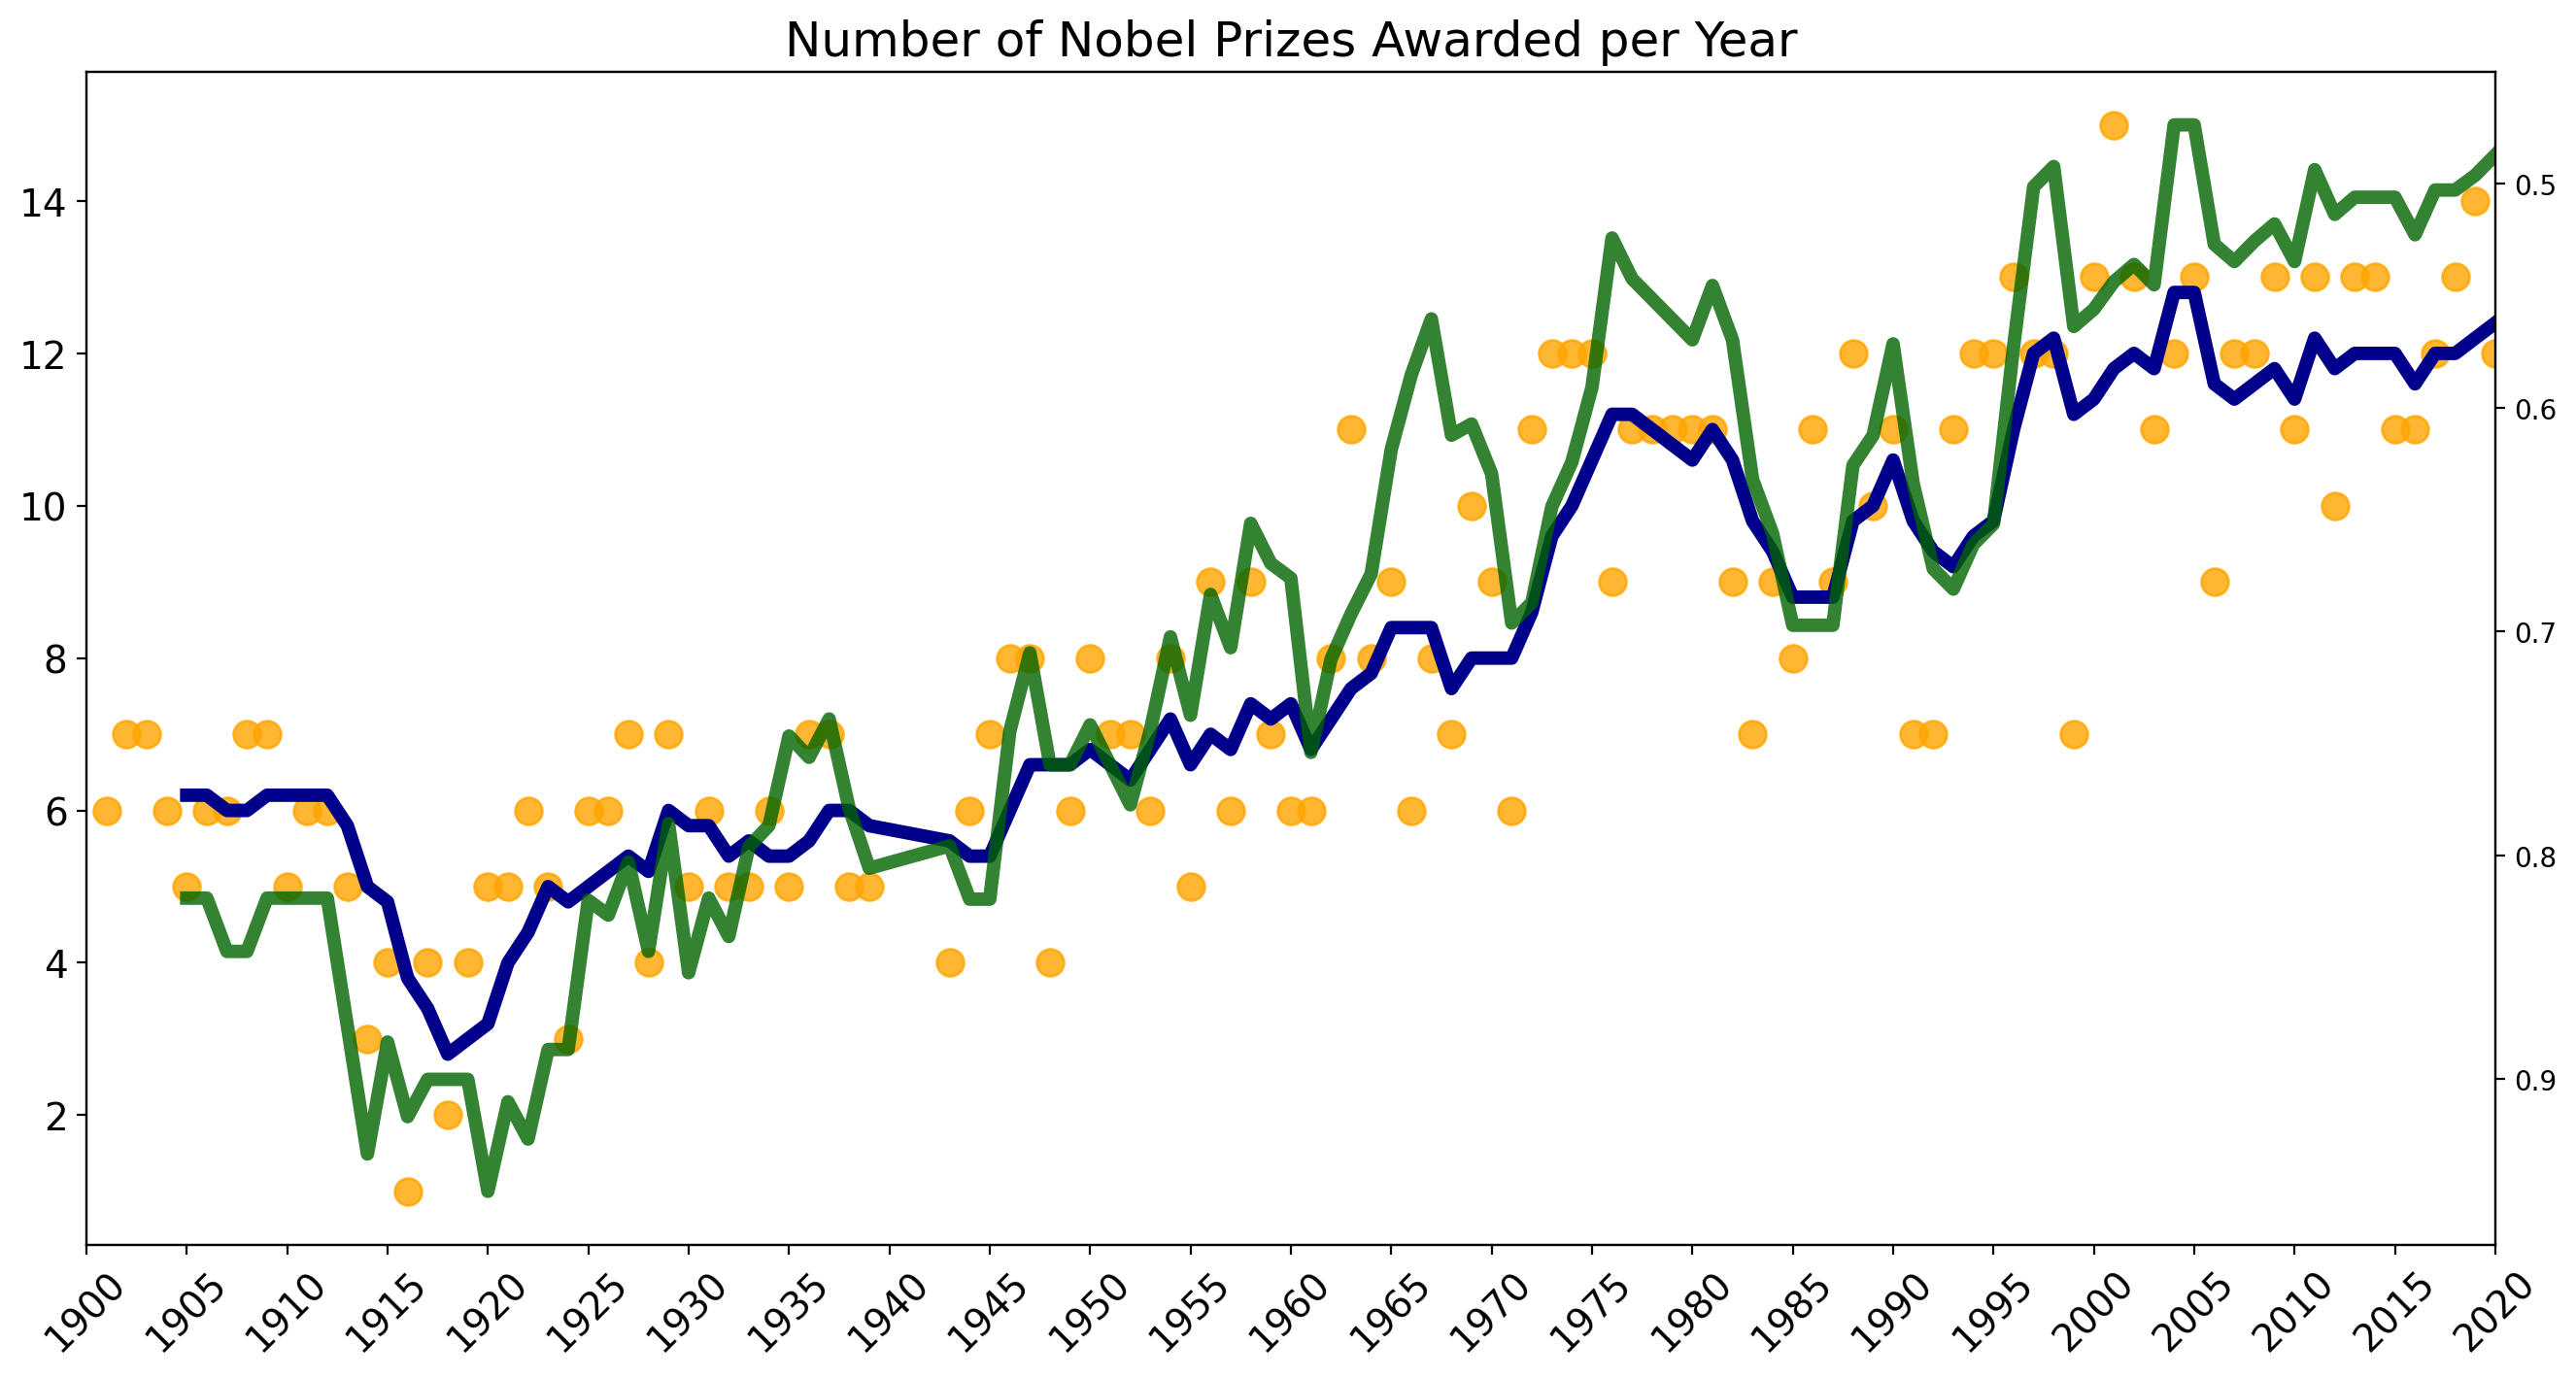

In [26]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() #copy the first axes
ax1.set_xlim(1900, 2020)

ax2.invert_yaxis() #inverting the 2. y_axes

ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='orange',
           alpha=0.8,
           s=100)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='darkblue', 
        linewidth=5)

ax2.plot(share_pct_per_year.index,
        share_moving_average,
        c='darkgreen',
        alpha=0.8,
        linewidth=5)
 
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [116]:
top20_countries = df_data.groupby(by='birth_country_current').agg({'prize': pd.Series.count})
top20_countries.sort_values('prize', ascending=False, inplace=True)
top20_countries = top20_countries[:20]
top20_countries.sample()

prize
birth_country_current       
China                     12

In [131]:
fig = px.bar(top20_countries, 
             y=top20_countries.index, 
             x='prize', 
             color='prize', 
             orientation='h',
            color_continuous_scale=px.colors.sequential.Blackbody,
            title='Top 20 countrys by number of prizes')
fig.update_layout(xaxis_title='Number of Prizes',
                 yaxis_title='Countrys',
                 coloraxis_showscale=False)
fig.show()

In [133]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')
 
city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

In [135]:
df_data[df_data['organization_city'] == 'Heidelberg']

year   category                                           prize  \
59   1910   Medicine  The Nobel Prize in Physiology or Medicine 1910   
156  1931  Chemistry               The Nobel Prize in Chemistry 1931   
157  1931  Chemistry               The Nobel Prize in Chemistry 1931   
197  1938  Chemistry               The Nobel Prize in Chemistry 1938   
285  1954    Physics                 The Nobel Prize in Physics 1954   
351  1963    Physics                 The Nobel Prize in Physics 1963   
494  1979  Chemistry               The Nobel Prize in Chemistry 1979   
616  1991   Medicine  The Nobel Prize in Physiology or Medicine 1991   
810  2008   Medicine  The Nobel Prize in Physiology or Medicine 2008   

                                            motivation prize_share  \
59   "in recognition of the contributions to our kn...         1/1   
156  "in recognition of their contributions to the ...         1/2   
157  "in recognition of their contributions to the ...         1/2   
197         "for his work on carotenoids and vitamins"         1/1   
285  "for the coincidence method and his discoverie...         1/2   
351  "for their discoveries concerning nuclear shel...         1/4   
494  "for their development of the use of boron- an...         1/2   
616  "for their discoveries concerning the function...         1/2   
810  "for his discovery of human papilloma viruses ...         1/2   

    laureate_type          full_name birth_date                   birth_city  \
59     Individual    Albrecht Kossel 1853-09-16                      Rostock   
156    Individual         Carl Bosch 1874-08-27                      Cologne   
157    Individual  Friedrich Bergius 1884-10-11  Goldschmieden, near Breslau   
197    Individual       Richard Kuhn 1900-12-03                       Vienna   
285    Individual      Walther Bothe 1891-01-08                  Oranienburg   
351    Individual  J. Hans D. Jensen 1907-06-25                      Hamburg   
494    Individual       Georg Wittig 1897-06-16                       Berlin   
616    Individual       Bert Sakmann 1942-06-12                    Stuttgart   
810    Individual  Harald zur Hausen 1936-03-11                Gelsenkirchen   

                 birth_country birth_country_current   sex  \
59       Mecklenburg (Germany)               Germany  Male   
156                    Germany               Germany  Male   
157           Germany (Poland)                Poland  Male   
197  Austria-Hungary (Austria)               Austria  Male   
285                    Germany               Germany  Male   
351                    Germany               Germany  Male   
494                    Germany               Germany  Male   
616                    Germany               Germany  Male   
810                    Germany               Germany  Male   

                 organization_name organization_city organization_country  \
59        University of Heidelberg        Heidelberg              Germany   
156       University of Heidelberg        Heidelberg              Germany   
157       University of Heidelberg        Heidelberg              Germany   
197            Max-Planck Institut        Heidelberg              Germany   
285       University of Heidelberg        Heidelberg              Germany   
351       University of Heidelberg        Heidelberg              Germany   
494       University of Heidelberg        Heidelberg              Germany   
616            Max-Planck-Institut        Heidelberg              Germany   
810  German Cancer Research Center        Heidelberg              Germany   

     ISO  share_pct  decade  
59   DEU       1.00    1910  
156  DEU       0.50    1930  
157  POL       0.50    1930  
197  AUT       1.00    1930  
285  DEU       0.50    1950  
351  DEU       0.25    1960  
494  DEU       0.50    1970  
616  DEU       0.50    1990  
810  DEU       0.50    2000

In [137]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

In [138]:
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [126]:
top20_countries = df_data.groupby(by='birth_country_current').agg({'prize': pd.Series.count})
top20_countries.sort_values('prize', ascending=False, inplace=True)

In [128]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

codes = [countries.get(country, 'Unknown code') for country in top20_countries.index]

top20_countries['codes'] = codes

In [130]:
fig = px.choropleth(top20_countries, locations="codes",
                    color="prize", #
                    hover_name="prize", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 
